In [ ]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv


--2024-09-02 17:20:12--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.3.33, 104.26.2.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  49.09K  --.-KB/s    in 0.004s  

2024-09-02 17:20:12 (12.4 MB/s) - ‘insurance.csv’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [ ]:
dataset = pd.read_csv('insurance.csv')
dataset.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [ ]:

dataset.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
expenses,0


In [ ]:
dataset.dtypes

In [ ]:
dataset.region.value_counts()

In [ ]:
dataset.sex.value_counts()

In [ ]:
df = dataset.join(pd.get_dummies(dataset.region, prefix='region')).drop('region', axis=1)
df.head()

,age,sex,bmi,children,smoker,expenses,region_northeast,region_northwest,region_southeast,region_southwest
0,19,female,27.9,0,yes,16884.92,False,False,False,True
1,18,male,33.8,1,no,1725.55,False,False,True,False
2,28,male,33.0,3,no,4449.46,False,False,True,False
3,33,male,22.7,0,no,21984.47,False,True,False,False
4,32,male,28.9,0,no,3866.86,False,True,False,False


In [ ]:

labels = {}

values        = df.sex.astype('category')
labels['sex'] = values.cat.categories
df['sex']     = values.cat.codes

df.head()

,age,sex,bmi,children,smoker,expenses,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.9,0,yes,16884.92,False,False,False,True
1,18,1,33.8,1,no,1725.55,False,False,True,False
2,28,1,33.0,3,no,4449.46,False,False,True,False
3,33,1,22.7,0,no,21984.47,False,True,False,False
4,32,1,28.9,0,no,3866.86,False,True,False,False


In [ ]:
df.smoker.value_counts()

,count
smoker,
no,1064
yes,274


In [ ]:
values           = df.smoker.astype('category')
labels['smoker'] = values.cat.categories
df['smoker']     = values.cat.codes

df.head()

,age,sex,bmi,children,smoker,expenses,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.9,0,1,16884.92,False,False,False,True
1,18,1,33.8,1,0,1725.55,False,False,True,False
2,28,1,33.0,3,0,4449.46,False,False,True,False
3,33,1,22.7,0,0,21984.47,False,True,False,False
4,32,1,28.9,0,0,3866.86,False,True,False,False


In [ ]:

labels

{'sex': Index(['female', 'male'], dtype='object'),
 'smoker': Index(['no', 'yes'], dtype='object')}

<Axes: >

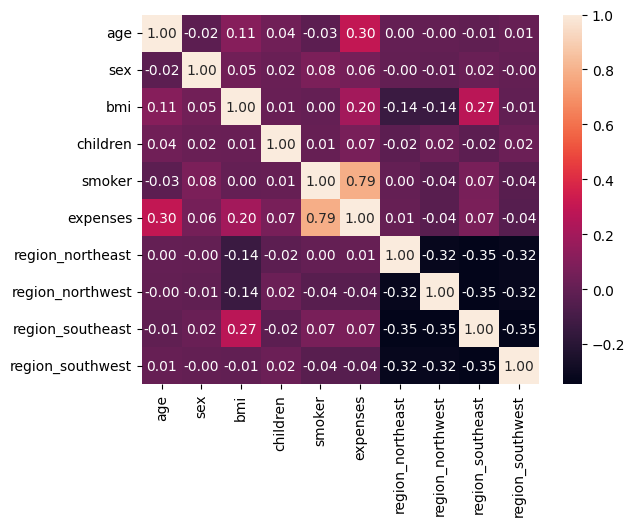

In [ ]:
sns.heatmap(df.corr(), annot=True, fmt='.2f')

In [ ]:
df.drop(['region_northeast', 'region_northwest', 'region_southeast', 'region_southwest'], axis=1, inplace=True)

In [ ]:
df.drop(['sex', 'children'], axis=1, inplace=True)

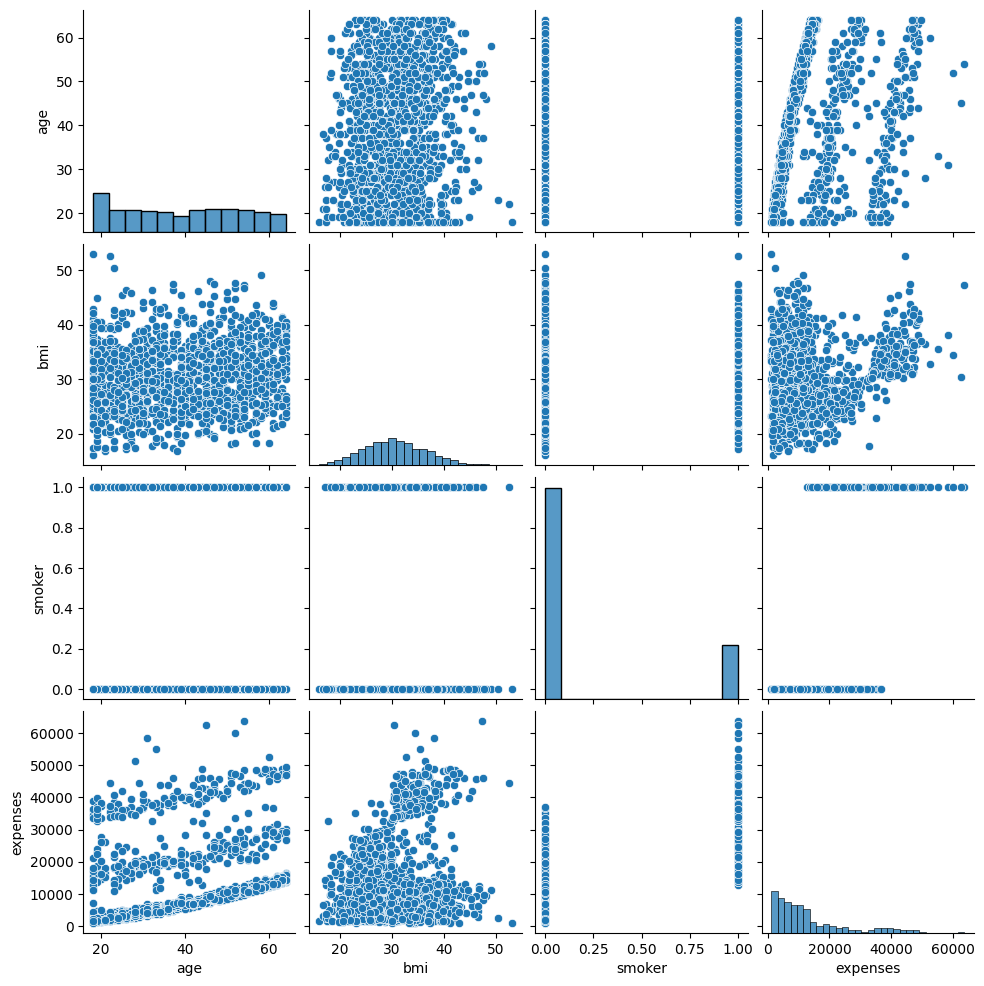

In [ ]:
sns.pairplot(df)

In [ ]:
df = df.sample(frac=1)

In [ ]:
size          = int(len(df) * .2)
train_dataset = df[:-size]
test_dataset  = df[-size:]

print(len(df), len(train_dataset), len(test_dataset))

1338 1071 267


In [ ]:
train_labels  = train_dataset['expenses']
train_dataset = train_dataset.drop('expenses', axis=1)


In [ ]:
test_labels   = test_dataset['expenses']
test_dataset  = test_dataset.drop('expenses', axis=1)

In [ ]:

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(len(train_dataset.keys()),)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])
model.compile(
    optimizer= tf.keras.optimizers.RMSprop(0.05),
    loss='mse',
    metrics=['mae', 'mse']
)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ batch_normalization                  │ (None, 3)                   │              12 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,493 (17.55 KB)

 Trainable params: 4,487 (17.53 KB)

 Non-trainable params: 6 (24.00 B)

In [ ]:
class EpochDots(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0:
      print()
      print('Epoch: {:d}, '.format(epoch), end='')
      for name, value in sorted(logs.items()):
        print('{}:{:0.4f}'.format(name, value), end=', ')
      print()

    print('.', end='')

In [ ]:

r = model.fit(train_dataset, train_labels, epochs=500,
              verbose=0, callbacks=[EpochDots()])



Epoch: 0, loss:110131304.0000, mae:6712.0234, mse:110131304.0000, 
....................................................................................................
Epoch: 100, loss:27296620.0000, mae:3305.4124, mse:27296620.0000, 
....................................................................................................
Epoch: 200, loss:21466466.0000, mae:2754.7544, mse:21466466.0000, 
....................................................................................................
Epoch: 300, loss:20319120.0000, mae:2667.2185, mse:20319120.0000, 
....................................................................................................
Epoch: 400, loss:21243696.0000, mae:2652.7559, mse:21243696.0000, 
....................................................................................................

In [ ]:

res = model.evaluate(test_dataset, test_labels, verbose=2)
print(res)


9/9 - 0s - 20ms/step - loss: 30325060.0000 - mae: 2988.9304 - mse: 30325060.0000
[30325060.0, 2988.930419921875, 30325060.0]


9/9 - 0s - 4ms/step - loss: 30325060.0000 - mae: 2988.9304 - mse: 30325060.0000
Testing set Mean Abs Error: 2988.93 expenses
You passed the challenge. Great job!
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


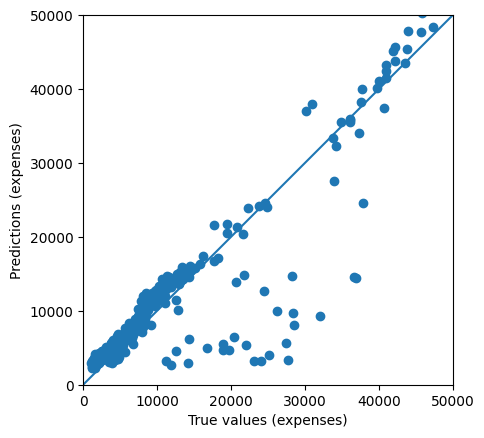

In [ ]:
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)